## **CAT and DOG classification Using Convulation neural network (CNN)**
# Without using existing architecture 

*Making own convulation model and train*


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:05<00:00, 233MB/s]
100% 1.06G/1.06G [00:05<00:00, 211MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
print(train_ds)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 103ms/step - loss: 1.6813 - accuracy: 0.5832 - val_loss: 1.1736 - val_accuracy: 0.6098
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6250 - accuracy: 0.6598 - val_loss: 0.5913 - val_accuracy: 0.6746
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5211 - accuracy: 0.7305 - val_loss: 0.5432 - val_accuracy: 0.7196
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4631 - accuracy: 0.7731 - val_loss: 0.5020 - val_accuracy: 0.7704
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.4060 - accuracy: 0.8104 - val_loss: 0.4663 - val_accuracy: 0.7850
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3675 - accuracy: 0.8327 - val_loss: 0.5149 - val_accuracy: 0.7512
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3062 - accuracy: 0.8633 - val_loss: 0.4540 - val_ac

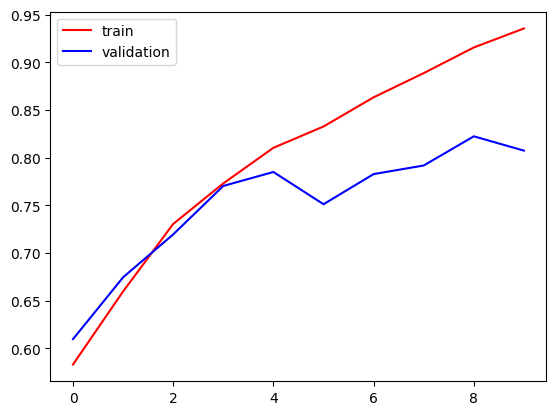

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

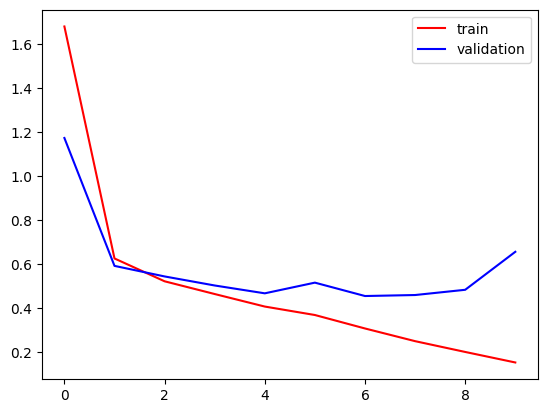

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## **Testing from unseen data**

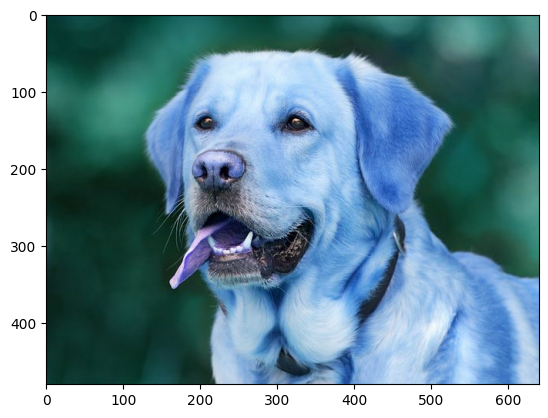

In [15]:
import cv2
test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [16]:
test_img.shape

(480, 640, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

pred = model.predict(test_input)


1/1 [==============================] - 0s 27ms/step


In [19]:
if(pred == 1):
  print("The images is dog")
else:
  print("The image is cat")

The images is dog


# **After Data Augmentation**

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [26]:
train_generator = train_datagen.flow_from_directory(
     '/content/train', 
        target_size=(256, 256),  
        batch_size=32,
        class_mode='binary')

Found 20000 images belonging to 2 classes.


In [27]:
validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(256,256),
        batch_size=32,
        class_mode='binary')

Found 5000 images belonging to 2 classes.


In [32]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // 32,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // 32)

<ipython-input-32-67aa8a68c3a6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
62/62 [==============================] - 37s 589ms/step - loss: 0.2982 - accuracy: 0.8705 - val_loss: 0.3970 - val_accuracy: 0.8213
Epoch 2/50
62/62 [==============================] - 36s 585ms/step - loss: 0.2956 - accuracy: 0.8710 - val_loss: 0.4883 - val_accuracy: 0.8000
Epoch 3/50
62/62 [==============================] - 35s 561ms/step - loss: 0.2946 - accuracy: 0.8725 - val_loss: 0.4037 - val_accuracy: 0.8075
Epoch 4/50
62/62 [==============================] - 36s 577ms/step - loss: 0.3037 - accuracy: 0.8760 - val_loss: 0.3288 - val_accuracy: 0.8575
Epoch 5/50
62/62 [==============================] - 38s 608ms/step - loss: 0.2803 - accuracy: 0.8851 - val_loss: 0.3545 - val_accuracy: 0.8500
Epoch 6/50
62/62 [==============================] - 37s 594ms/step - loss: 0.2945 - accuracy: 0.8715 - val_loss: 0.3863 - val_accuracy: 0.8325
Epoch 7/50
62/62 [==============================] - 37s 602ms/step - loss: 0.2735 - accuracy: 0.8886 - val_loss: 0.3248 - val_accuracy: 0.8687

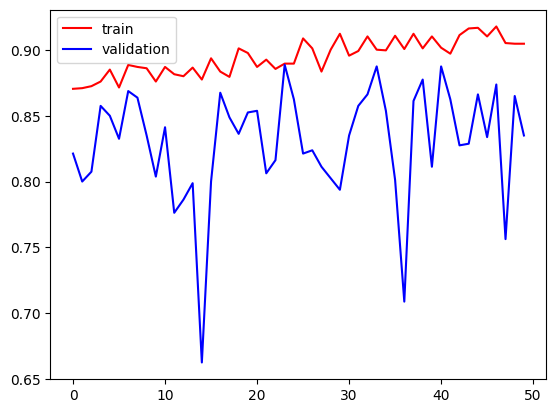

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


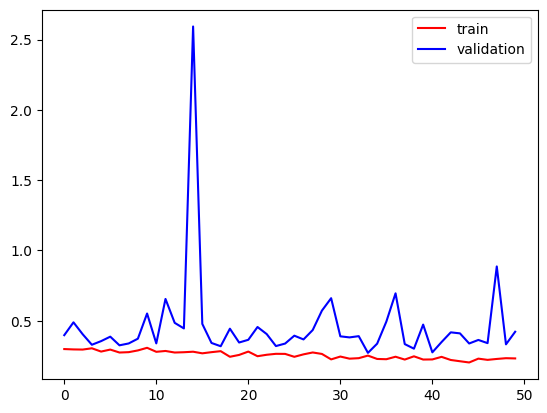

In [34]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


# The accuracy of this model is 0.90 and validation accuracy is 0.83
### Here the overfitting is reduced after data augmentation.